In [1]:
import pandas as pd
from numpy import array
import numpy as np
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import LeakyReLU
from keras.callbacks import EarlyStopping
import csv
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from math import sqrt
import math
from statistics import mean
from datetime import date
import datetime

import os
from sklearn.utils import check_array as check_arrays
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import SGDRegressor 
from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import VotingRegressor

import matplotlib.pyplot as plt

Using TensorFlow backend.


In [26]:
# Create folder to save results in
identify = 'TimeSeriesRF_NN11_28days_ValSongs'
folder_name = '/Users/clausholm/Documents/Python/Master_thesis/Data/test_results/'+identify
#os.mkdir(folder_name)

# Load Dataset
df = pd.read_csv('datasets/Dataset_DailyPlays_DomainFeatures.csv', sep=';', index_col=0, decimal=',')
df = df.drop(columns=['Slope28', 'ArtistPopularity', 'Slope56','FirstWeek','Label 2'])

# Set dataset range
df_range = '160'
df = df.loc[:, :df_range]

# Uncomment to create dataset of test song along with nearest neighbors index

"""
# # Katy Perry - Never Really Over 
df = df.iloc[[33,37,5,4,45,49,74,6,83,70,87]]
"""
"""             
# Taylor Swift - You Need To Calm Down
df = df.iloc[[83,74,70,87,90,49,40,51,4,45,60]]
"""
"""
# Shawn Mendes & Camila Cabello - SeÃ±orita
df = df.iloc[[78,88,9,84,33,37,5,6,4,45,49]]
"""
"""
# Ava Max - So Am I
df = df.iloc[[5,37,45,33,6,74,49,70,4,83,51]]
"""
"""
# Andreas Bourani
df = df.iloc[[2,86,27,82,63,67,16,68,65,43,54]]
"""
"""
# Meduza feat. Goodboys - Piece Of Your Heart
df = df.iloc[[57,95,46,73,58,18,81,29,26,8,24]]
"""
"""
# Pietro Lombardi - Nur Ein Tanz
df = df.iloc[[68,79,82,28,65,80,43,1,61,22,39]]
"""
"""
# Loud Luxury feat. brando - Body
df = df.iloc[[46,58,95,91,66,24,73,57,8,64,13]]
"""
"""
# Mark Forster - Sowieso
df = df.iloc[[50,23,10,89,38,56,20,0,48,60,52]]
"""
#"""
# Camila Cabello feat. Young Thug - Havana
df = df.iloc[[10,50,89,23,56,60,40,51,90,0,20]]
#"""
#####################################

"""
# # Dotan - Numb
df = df.iloc[[22,68,82,79,92,85,28,27,2,86,65]]
"""
"""             
# The Script - The Last Time
df = df.iloc[[85,27,82,67,86,2,68,34,22,79,11]]
"""
"""
# Mark Ronson feat. Miley Cyrus - Nothing Breaks Like A Heart
df = df.iloc[[51,40,90,56,10,70,87,60,83,89,74]]
"""
"""
# Dynoro & Gigi Dagostino - In My Mind
df = df.iloc[[23,50,20,10,38,48,0,60,89,52,53]]
"""
"""
# Lea - Zu dir
df = df.iloc[[41,32,42,11,69,93,34,12,3,17,31]]
"""
"""
# Marshmello feat. Chvrches - Here With Me
df = df.iloc[[53,31,52,38,93,20,48,76,30,12,41]]
"""
"""
# Kygo & Whitney Houston - Higher Love
df = df.iloc[[37,5,33,45,6,49,74,4,70,83,87]]
"""
"""
# Calvin Harris & Ragnbone Man - Giant
df = df.iloc[[9,84,37,5,33,6,45,4,49,74,70]]
"""
"""
# Bausa - Was Du Liebe nennst
df = df.iloc[[7,48,20,52,93,41,69,17,38,31,42]]
"""
"""
# Lotte & Max Giesinger - Auf das, was da noch kommt
df = df.iloc[[45,5,37,74,33,49,70,6,4,83,51]]
"""

df

,1,2,3,4,5,6,7,8,9,10,...,151,152,153,154,155,156,157,158,159,160
Camila Cabello feat. Young Thug - Havana,74,117,99,143,123,128,126,147,126,153,...,907,852,846,876,799,794,842,831,792,773
Mark Forster - Sowieso,31,47,61,75,97,120,118,120,144,136,...,1207,1256,1157,1238,1175,1144,1336,1172,1186,1272
Wincent Weiss - Hier mit dir,48,81,134,94,90,169,137,123,134,200,...,683,633,609,456,524,542,567,513,543,482
Dynoro & Gigi D'agostino - In My Mind,36,59,74,70,79,96,106,133,123,126,...,1071,1013,1041,1030,1081,1033,1054,986,1000,987
Max Giesinger - Wenn sie tanzt,28,44,46,52,86,100,217,178,197,141,...,873,936,816,859,768,787,754,746,793,702
Namika - Je ne parle pas franÃ§ais,39,65,76,93,92,116,143,134,103,174,...,951,974,914,956,856,898,874,892,889,784
"Lauv & Anne-Marie - Fuck, I'm Lonely",98,137,79,131,118,150,135,226,159,190,...,62,63,64,66,64,77,57,71,63,59
Mark Ronson feat. Miley Cyrus - Nothing Breaks Like A Heart,116,109,81,92,97,148,120,174,208,214,...,847,814,841,840,792,733,766,778,815,767
Wincent Weiss - Kaum Erwarten,75,104,92,101,103,191,149,247,208,207,...,380,414,388,410,368,326,391,325,314,348
Adel Tawil - Unsere Lieder,35,33,61,54,146,165,188,199,212,125,...,33,35,34,45,29,40,47,21,30,33


In [27]:
# Define validation dataset with songs to test on
dfVal = df[:1]
list_of_test_songs = dfVal.index[0]

dfVal

,1,2,3,4,5,6,7,8,9,10,...,151,152,153,154,155,156,157,158,159,160
Camila Cabello feat. Young Thug - Havana,74,117,99,143,123,128,126,147,126,153,...,907,852,846,876,799,794,842,831,792,773


In [28]:
# Define dataset with songs to train on
df_train_test = df[1:]
df_train_test

,1,2,3,4,5,6,7,8,9,10,...,151,152,153,154,155,156,157,158,159,160
Mark Forster - Sowieso,31,47,61,75,97,120,118,120,144,136,...,1207,1256,1157,1238,1175,1144,1336,1172,1186,1272
Wincent Weiss - Hier mit dir,48,81,134,94,90,169,137,123,134,200,...,683,633,609,456,524,542,567,513,543,482
Dynoro & Gigi D'agostino - In My Mind,36,59,74,70,79,96,106,133,123,126,...,1071,1013,1041,1030,1081,1033,1054,986,1000,987
Max Giesinger - Wenn sie tanzt,28,44,46,52,86,100,217,178,197,141,...,873,936,816,859,768,787,754,746,793,702
Namika - Je ne parle pas franÃ§ais,39,65,76,93,92,116,143,134,103,174,...,951,974,914,956,856,898,874,892,889,784
"Lauv & Anne-Marie - Fuck, I'm Lonely",98,137,79,131,118,150,135,226,159,190,...,62,63,64,66,64,77,57,71,63,59
Mark Ronson feat. Miley Cyrus - Nothing Breaks Like A Heart,116,109,81,92,97,148,120,174,208,214,...,847,814,841,840,792,733,766,778,815,767
Wincent Weiss - Kaum Erwarten,75,104,92,101,103,191,149,247,208,207,...,380,414,388,410,368,326,391,325,314,348
Adel Tawil - Unsere Lieder,35,33,61,54,146,165,188,199,212,125,...,33,35,34,45,29,40,47,21,30,33
"Dj Snake feat. Selena Gomez, Ozuna, Cardi B - Taki Taki",30,31,43,51,64,63,77,86,88,106,...,183,192,182,184,221,189,180,186,174,185


In [29]:
# Split train dataset into input and output days. Change value of input_days
n_steps_in = 28
number_of_total_days = 112
n_steps_out = number_of_total_days - n_steps_in

# define the train data input and output
input_data = df_train_test.iloc[:, 0:n_steps_in]
output_data = df_train_test.iloc[:, n_steps_in:number_of_total_days]

train_input, test_input, train_output, test_output = train_test_split(input_data, output_data, test_size=0.2, random_state=42)

# Set X and y to train and test input and output data
train_input = array(train_input)
train_output = array(train_output)
test_input = array(test_input)
test_output = array(test_output)

# create scaler
#x_scaler = MinMaxScaler()
#y_scaler = MinMaxScaler()
#x_scaler = StandardScaler()
#y_scaler = StandardScaler()


# fit scaler on data
#train_input = x_scaler.fit_transform(train_input)
#train_output = y_scaler.fit_transform(train_output)
#test_input = x_scaler.transform(test_input)

print("Input days: ", len(train_input[0])) 
print("Output days: ", len(train_output[0]))
print("Example of first song input data: ", train_input[0])
print("Example of first song output data: ", train_output[0])


Input days:  28
Output days:  84
Example of first song input data:  [ 98 137  79 131 118 150 135 226 159 190 239 278 242 172 324 310 326 395
 371 345 250 352 362 352 388 418 479 417]
Example of first song output data:  [462 487 482 527 515 546 522 490 596 680 638 560 568 633 581 477 493 557
 522 467 465 468 592 566 503 455 519 514 555 523 499 423 470 512 550 494
 522 513 470 459 397 471 506 463 471 518 540 499 523 459 505 461 550 466
 450 450 436 438 503 415 503 487 377 457 419 464 373 424 415 437 441 366
 363 323 352 407 372 261 262 236 222 197 211 216]


In [30]:
# define the train data input and output
val_input_data = dfVal.iloc[:, 0:n_steps_in]
val_output_data = dfVal.iloc[:, n_steps_in:number_of_total_days]

# Set X and y to train input and output data
val_input = array(val_input_data)
val_output = array(val_output_data)

#val_input = x_scaler.transform(val_input)

In [31]:
# RF
best_ensemble = RandomForestRegressor()

# MLP
#best_ensemble = MLPRegressor()

best_ensemble.fit(train_input, train_output)

yhat = best_ensemble.predict(val_input)

# transform data back from standardized or normalized
#yhat = y_scaler.inverse_transform(yhat)

print(yhat)

[[403.96 376.44 385.23 383.28 417.2  435.21 456.65 458.8  478.26 469.16
  471.16 487.86 488.87 524.85 531.09 541.04 529.12 561.72 568.76 592.28
  587.72 610.59 660.57 653.03 618.4  628.98 636.39 648.71 654.32 664.1
  683.01 693.3  695.76 700.75 710.34 754.21 738.08 755.68 728.81 772.
  765.22 758.15 757.21 775.54 797.57 777.81 811.4  785.31 799.81 820.81
  789.12 808.91 829.31 828.28 829.53 835.47 829.92 848.62 865.55 874.83
  829.64 855.46 849.38 863.33 859.72 849.59 845.48 855.37 883.91 872.99
  842.23 836.87 832.62 871.55 874.34 828.19 777.86 872.2  869.33 874.61
  886.58 885.33 879.92 872.02]]


Camila Cabello feat. Young Thug - Havana
Bias: 62.802619
MAE: 68.462143
MAPE: 8.743418
MSE: 6820.513810
RMSE: 82.586402
RMSPE 10.331772
_________________________


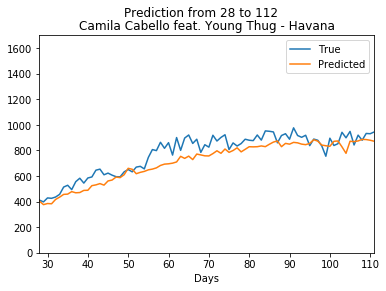

Song:  Camila Cabello feat. Young Thug - Havana
Prediction from 28 to 112
________________________________________________________________


In [32]:
# Make folder to each model to save results of model
path = folder_name

# Create variable for each song, used to compare predicted and true value
lst1 = [val_output[0], yhat[0]]

# Set value for labelling
daysOrWeeks = 'Days'

# Make dataset of test song variables
df1 = pd.DataFrame(lst1).T
df1.columns = ['True', 'Predicted']
df1[daysOrWeeks] = df1.index + n_steps_in
df1.set_index(daysOrWeeks,inplace=True)

# Forecast Error (or Residual Forecast Error)
forecast_errors = [val_output[i]-yhat[i] for i in range(len(val_output))]
#print('Forecast Errors: %s' % forecast_errors)  

df_result = pd.DataFrame(columns=['Song', 'Date', 'Bias', 'MAE', 'MAPE', 'MSE', 'RMSE', 'RMSPE', 'Predict_from', 'Predict_to'])

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

def root_mean_square_percentage_error(y_true, y_pred):
    loss = np.sqrt(np.mean(np.square(((y_true - y_pred) / y_true)), axis=0)) * 100
    return loss

for i in range(len(val_output)):
    print(list_of_test_songs)

    # Mean Forecast Error (or Forecast Bias), Mean Absolute Error, Mean Squared Error, Root Mean Squared Error  
    bias = mean(forecast_errors[i])
    mae = mean(abs(forecast_errors[i]))
    mape = mean_absolute_percentage_error(val_output[i], yhat[i])
    mse = mean_squared_error(val_output[i], yhat[i]) 
    rmse = sqrt(mse)
    rmspe = root_mean_square_percentage_error(val_output[i], yhat[i])
    df_result = df_result.append({'Date': date.today(),'Song': list_of_test_songs, 'Bias': bias, 'MAE': mae, 'MAPE': mape, 'MSE': mse, 'RMSE': rmse, 'RMSPE': rmspe, 'Predict_from':n_steps_in, 'Predict_to': number_of_total_days}, ignore_index=True)

    print('Bias: %f' % bias)
    print('MAE: %f' % mae)
    print('MAPE: %f'% mape)
    print('MSE: %f' % mse)
    print('RMSE: %f' % rmse)
    print('RMSPE %f' % rmspe)
    print('_________________________')

# Create datetime for time of results
now = datetime.datetime.now()
now = str(now.strftime("%Y-%m-%d %H:%M:%S"))
    
# Define plotting of graphs and saving them to folder
pred_title = "Prediction from "+ str(n_steps_in)+" to "+str(number_of_total_days)
fig_size = 1700

# Make dataset of test song variables
df1.plot()
plt.ylim((0,fig_size))
plt.title(list_of_test_songs)
plt.suptitle(pred_title)
#plt.savefig(path+'/'+list_of_test_songs+ '_'+ identify +'.png')
plt.show()
plt.close()
print("Song: ", list_of_test_songs)
print(pred_title)
print('________________________________________________________________')

# Save Results to csv file in folder
#df_result.to_csv(path+'/'+identify+'_'+now+'.csv', sep=';', decimal=',' )
